# Strategy 8 - Simple CNN

 this notebook, we will test a simple version of the CNN for price prediction. This version uses:

    Fewer technical indicators (5 instead of 23)

    A lighter CNN architecture (1 convolutional layer instead of 3)

    Fewer parameters to train

    Early stopping to prevent overfitting

We initially tried to use much more complexe CNN model but the running time was too long.

In [1]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from strategies.simple_cnn import SimpleCNNStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_handler = DataHandler(ticker='AAPL', start_date='2004-12-12', end_date='2015-12-12')
in_sample_data = data_handler.fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
cnn_strategy = SimpleCNNStrategy(window_size=20, n_splits=5, epochs=30, batch_size=32)
cnn_strategy.fit(in_sample_data)

print("Cross-validation MSE scores (in-sample):")
for i, score in enumerate(cnn_strategy.cv_scores, 1):
    print(f"Fold {i}: {score:.6f}")
print(f"\nMean MSE: {np.mean(cnn_strategy.cv_scores):.6f}")
print(f"Std MSE: {np.std(cnn_strategy.cv_scores):.6f}")

Cross-validation MSE scores (in-sample):
Fold 1: 0.004579
Fold 2: 0.000765
Fold 3: 0.071877
Fold 4: 0.007622
Fold 5: 0.003923

Mean MSE: 0.017753
Std MSE: 0.027149


[*********************100%***********************]  1 of 1 completed

 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


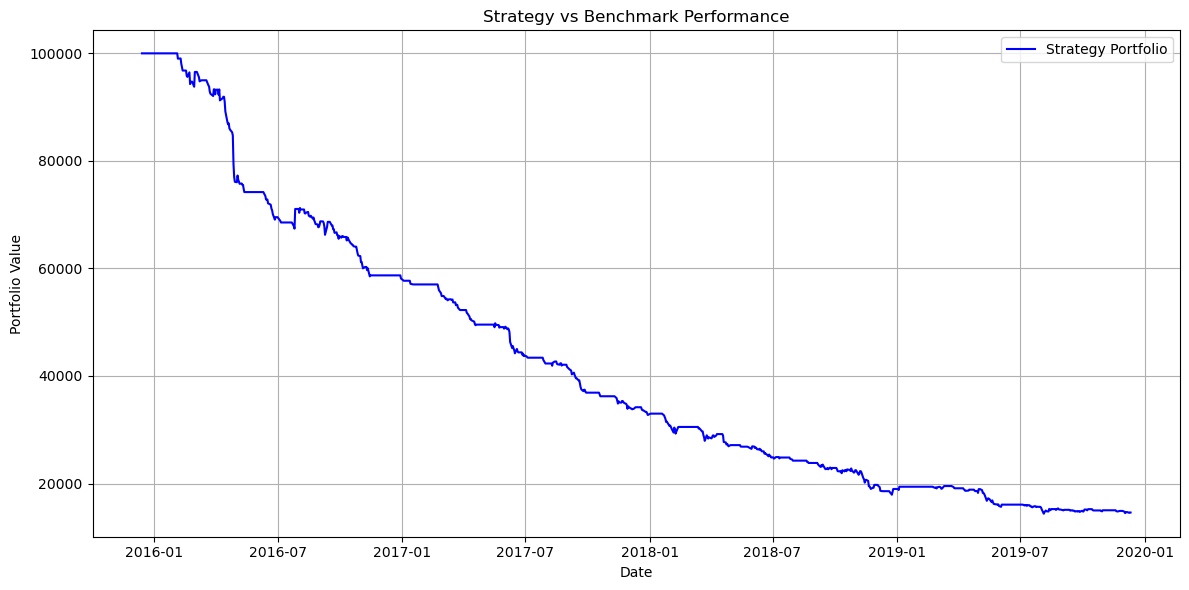


Out-of-sample Backtest Results:
Final Value: 14603.5338
Return: -0.8540
Sharpe Ratio: -3.2827
Max Drawdown: -0.8562


In [4]:
data_handler = DataHandler(ticker='AAPL', start_date='2015-12-12', end_date='2019-12-12')
out_sample_data = data_handler.fetch_data()

backtester = Backtest(out_sample_data, cnn_strategy)
results = backtester.run()

print("\nOut-of-sample Backtest Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

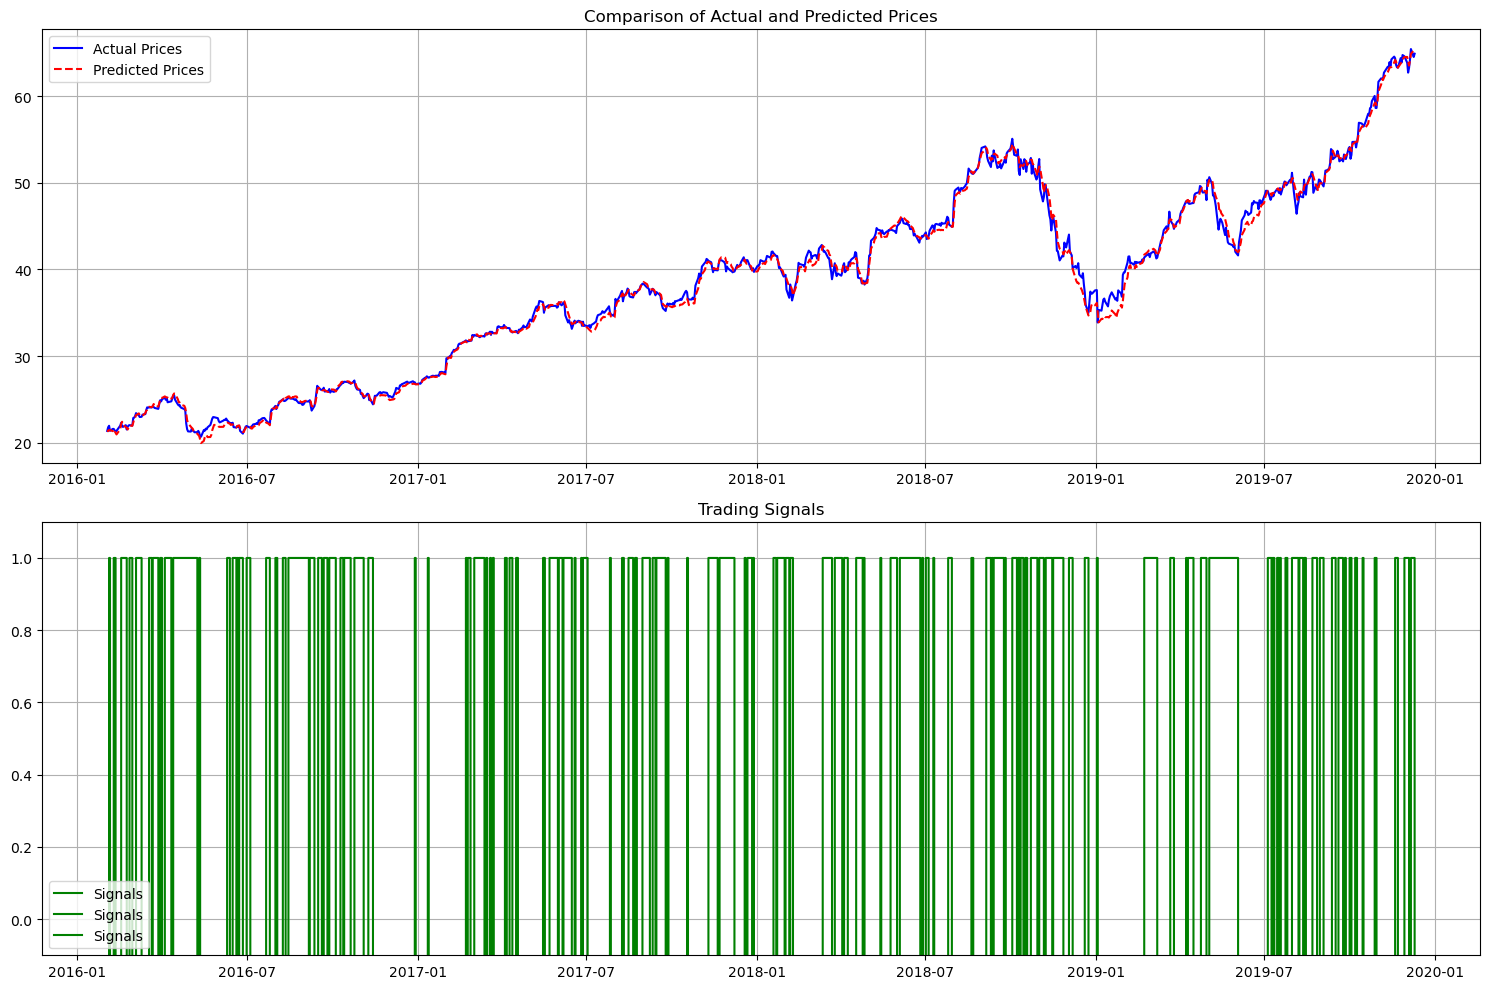


Cross-validation MSE scores:
Fold 1: 0.004579
Fold 2: 0.000765
Fold 3: 0.071877
Fold 4: 0.007622
Fold 5: 0.003923
Mean MSE: 0.017753 (±0.027149)


In [5]:
# Visualisation des prédictions et signaux
cnn_strategy.plot_signals(out_sample_data)

## Run Backest on 100 stocks and on out of sample dataset

In [41]:
in_sample_start = "2004-12-31"
in_sample_end = '2015-12-30'
out_sample_start = '2015-12-31'
out_sample_end = '2019-12-31'

tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] 

initial_cash = 100000
performance_summary = []
portfolio_series_list = []

for ticker in tickers:
    try:
        # Fetch data
        full_data_handler = DataHandler(ticker=ticker, start_date=in_sample_start, end_date=out_sample_end)
        full_data = full_data_handler.fetch_data()

        # Split data into in-sample and out-of-sample
        in_sample_data = full_data[full_data.index <= in_sample_end]
        out_sample_data = full_data[(full_data.index >= out_sample_start) & (full_data.index <= out_sample_end)]

        if len(in_sample_data) < 100 or len(out_sample_data) < 100:
            print(f"Skipping {ticker} due to insufficient data.")
            continue

         # Train CNN model on in-sample
        cnn_strategy = SimpleCNNStrategy(window_size=20, n_splits=5, epochs=30, batch_size=32)
        cnn_strategy.fit(in_sample_data)

        # Backtest on out-of-sample data
        backtester = Backtest(out_sample_data, cnn_strategy, initial_cash=initial_cash, plot_results=False)
        results = backtester.run()
        portfolio_series = backtester.get_portfolio_value_series()

        # Store performance
        performance_summary.append({
            'Ticker': ticker,
            **results
        })
        portfolio_series_list.append(portfolio_series.rename(ticker))

    except Exception as e:
        print(f"Error processing {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[*********************100%***********************]  1 of 1 completed


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


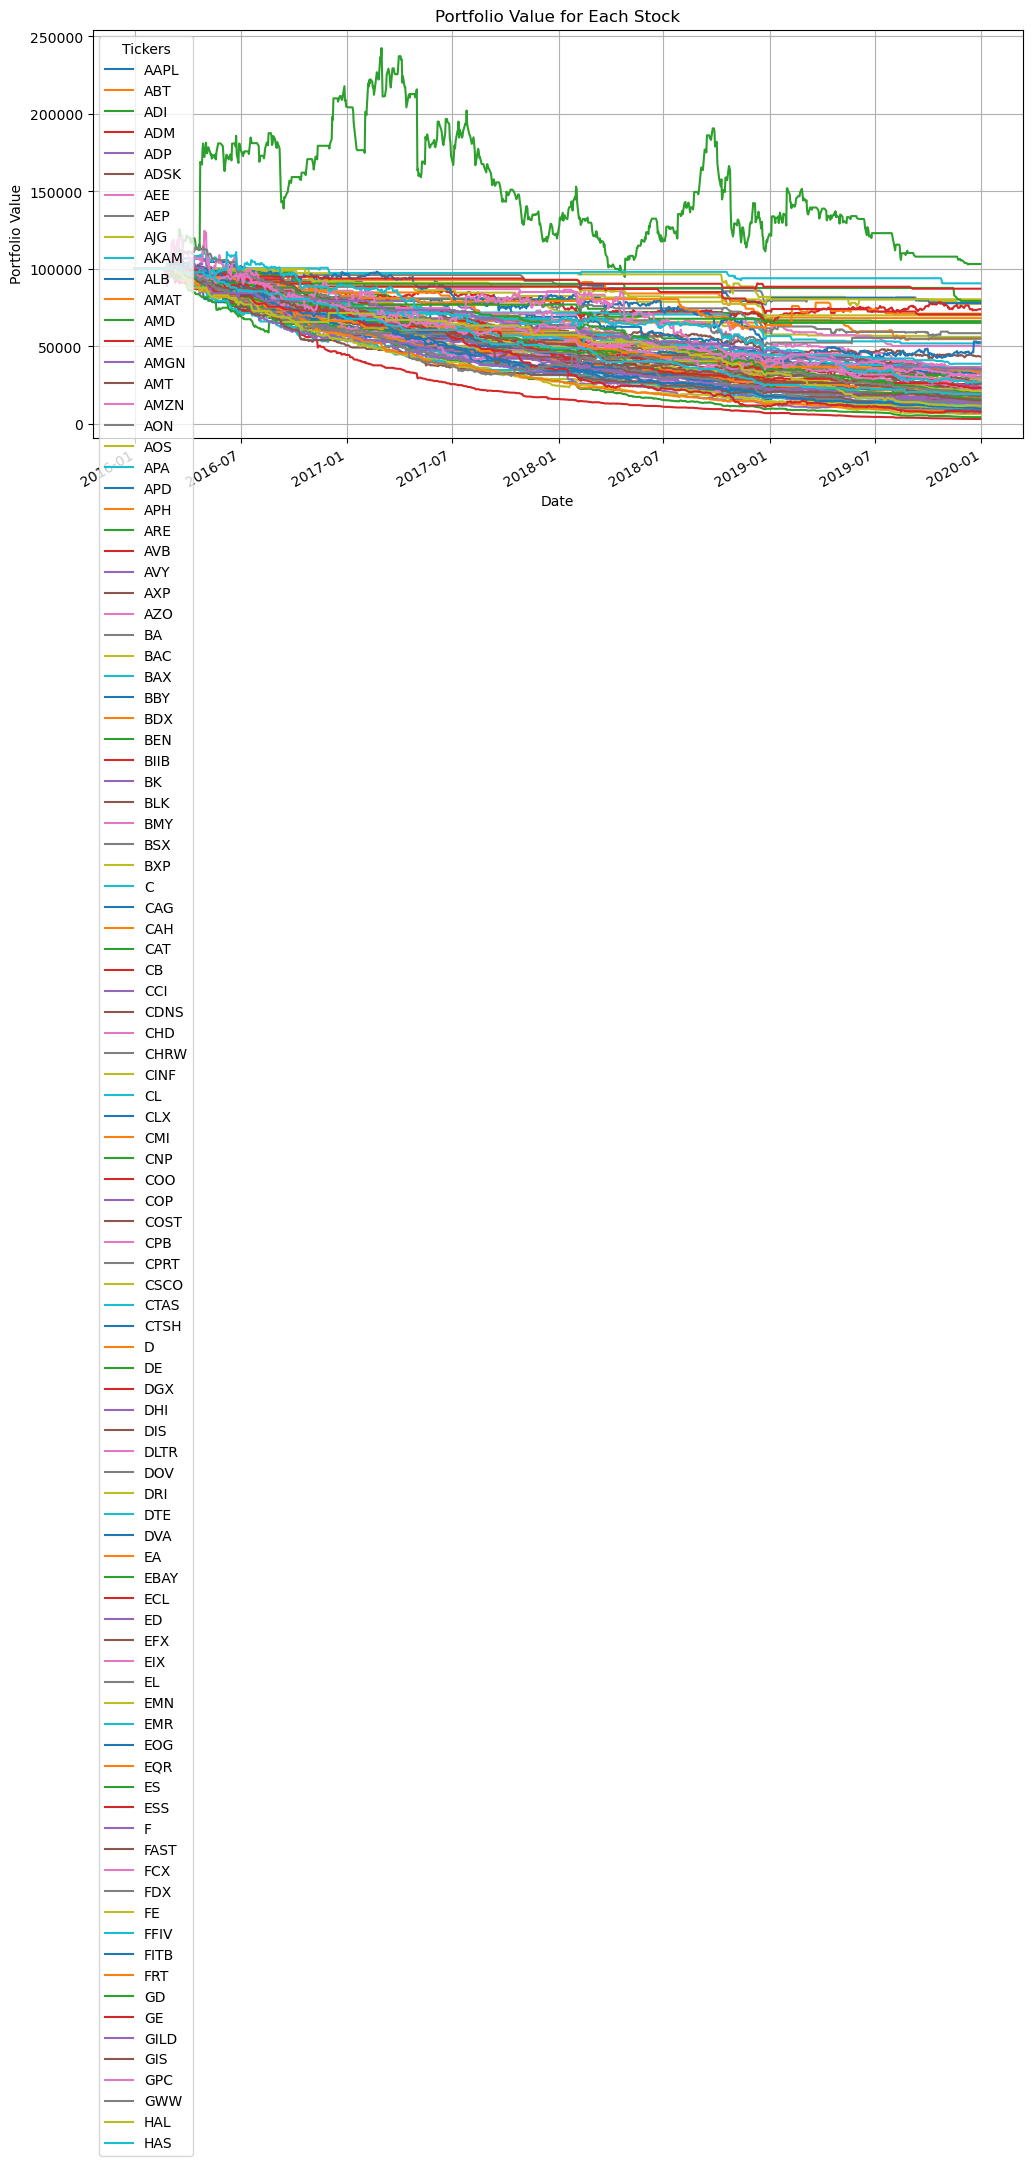

   Ticker   Final Value    Return  Sharpe Ratio  Max Drawdown
0    AAPL  13069.999119 -0.869300     -3.357380     -0.869300
1     ABT  68209.242980 -0.317908     -1.569060     -0.352689
2     ADI  35092.081268 -0.649079     -2.136387     -0.663990
3     ADM   3200.482364 -0.967995     -6.219379     -0.969098
4     ADP  36254.513612 -0.637455     -2.735479     -0.639864
..    ...           ...       ...           ...           ...
95    GIS  17890.175357 -0.821098     -2.879970     -0.821098
96    GPC  29706.966394 -0.702930     -1.905845     -0.704328
97    GWW  19115.131668 -0.808849     -1.688661     -0.812120
98    HAL  11685.145760 -0.883149     -3.774577     -0.885969
99    HAS  19089.004241 -0.809110     -3.725474     -0.809257

[100 rows x 5 columns]


In [57]:
# Combine all portfolio series
combined_portfolio = pd.concat(portfolio_series_list, axis=1)
combined_portfolio.plot(figsize=(12, 6))
plt.title('Portfolio Value for Each Stock')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend(title='Tickers')
plt.grid(True)
plt.show()

# Display summary of performance metrics
performance_df = pd.DataFrame(performance_summary)
print(performance_df)

In [47]:
# Create DataFrame
perf_df = pd.DataFrame(performance_summary)

# Summary statistics
print("\n=== Summary Statistics ===")
print(perf_df.describe().round(4))

# Mean values
mean_metrics = perf_df[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics.round(4))


=== Summary Statistics ===
       Final Value    Return  Sharpe Ratio  Max Drawdown
count     100.0000  100.0000      100.0000      100.0000
mean    31555.6048   -0.6844       -2.6326       -0.7029
std     23283.8136    0.2328        1.2924        0.2145
min      3200.4824   -0.9680       -6.2194       -0.9691
25%     14031.7213   -0.8597       -3.6756       -0.8623
50%     24939.5590   -0.7506       -2.5998       -0.7649
75%     36369.1671   -0.6363       -1.6652       -0.6395
max    103132.4553    0.0313        0.2486       -0.0997

=== Mean Metrics ===
Return             -0.6844
Sharpe Ratio       -2.6326
Final Value     31555.6048
Max Drawdown       -0.7029
dtype: float64


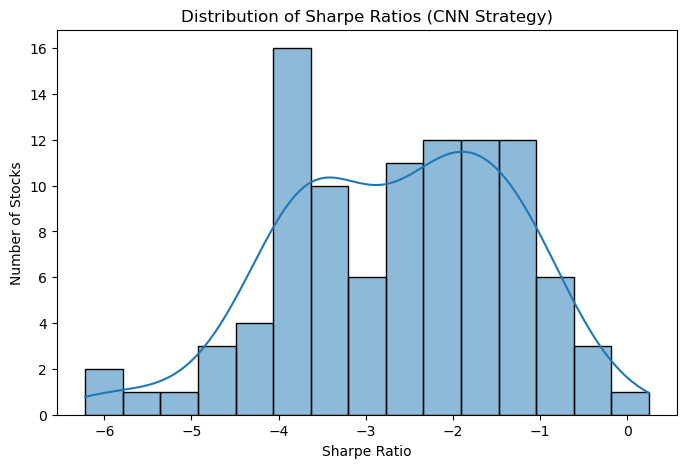

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(perf_df['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios (CNN Strategy)')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()
